# AMAZON CONSUMER BEHAVIOR DATASET ANALYSIS

For this project, we will be looking at the [Aamzon Consumer Behavior Dataset](https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset). This dataset was chosen because it fits the project requirements (23 attributes, 600+ records) and is an interesting datasets to analyze how consumer behavior in Amazon is affected by differnet recorded attributes. This will help us gain insights into consumer behavior modeling by visually drawing insights and patterns from the dataset. 

## Loading the dataset and inspecting its structure

We login to kaggle hub using the api key present on ~/.kaggle/kaggle.json (You need to request an api key from kagglehub and downloas the kaggle.json file if you do not have one). Then we download a Amazon consumer behavior dataset with 23 different attributes and 600+ unique values.

In [18]:
import kagglehub

kagglehub.login()

path = kagglehub.dataset_download('swathiunnikrishnan/amazon-consumer-behaviour-dataset')

Inspecting the consumer behavior dataset using pandas. 

In [19]:
import os
import pandas as pd

df = pd.read_csv(os.path.join(path, 'Amazon Customer Behavior Survey.csv'))

# 1. BASIC OVERVIEW
print("=== BASIC DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")  # (rows, columns)
print(f"Columns: {list(df.columns)}")
print(f"Size: {df.size} total elements")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 2. FIRST/LAST LOOK
print("\n=== FIRST 5 ROWS ===")
print(df.head())
print("\n=== LAST 5 ROWS ===")
print(df.tail())

# 3. DATA TYPES & MISSING VALUES
print("\n=== DATA TYPES & MISSING VALUES ===")
print(df.info())
print("\n=== MISSING VALUES SUMMARY ===")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_percent.round(2)
})
print(missing_df[missing_df['Missing Count'] > 0])

# 4. COLUMN-SPECIFIC INSPECTION
print("\n=== COLUMN DATA TYPES ===")
print(df.dtypes)

print("\n=== UNIQUE VALUE COUNTS ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# 5. STATISTICAL SUMMARY
print("\n=== NUMERICAL COLUMNS SUMMARY ===")
print(df.describe())

print("\n=== CATEGORICAL COLUMNS SUMMARY ===")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(df[categorical_cols].describe())
else:
    print("No categorical columns found")

# 6. SAMPLE DATA EXAMPLES
print("\n=== RANDOM SAMPLE ===")
print(df.sample(5))  # 5 random rows




=== BASIC DATASET OVERVIEW ===
Shape: (602, 23)
Columns: ['Timestamp', 'age', 'Gender', 'Purchase_Frequency', 'Purchase_Categories', 'Personalized_Recommendation_Frequency', 'Browsing_Frequency', 'Product_Search_Method', 'Search_Result_Exploration', 'Customer_Reviews_Importance', 'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness', 'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness', 'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas']
Size: 13846 total elements
Memory usage: 0.68 MB

=== FIRST 5 ROWS ===
                        Timestamp  age             Gender  \
0  2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1  2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2  2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3  2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4  2023/06/04 5

## DATA CLEANUP

This section focuses on cleaning and preparing the dataset for analysis. We handle missing values, remove duplicates, correct inconsistencies in column names and categorical values, and identify noisy data including outliers. These cleaning steps ensure data quality and consistency before conducting exploratory data analysis.
### 

### Handling Missing Values

In this section, we check for missing values across all columns in the dataset, identify which columns have missing data, and apply appropriate imputation strategies. For this dataset, we use mode imputation since the missing values are minimal (only 2 values in Product_Search_Method column, 0.33% of data) and categorical in nature.

In [20]:
# Check missing values before handling
print("=== MISSING VALUES BEFORE CLEANUP ===")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])

# Handle missing values in Product_Search_Method (2 missing values, 0.33% of data)
# Since it's a small percentage, we'll use mode imputation
mode_product_search = df['Product_Search_Method'].mode()[0]
print(f"\nMost frequent Product_Search_Method: {mode_product_search}")

# Fill missing values with mode
df['Product_Search_Method'].fillna(mode_product_search, inplace=True)

# Verify no missing values remain
print("\n=== MISSING VALUES AFTER CLEANUP ===")
missing_after = df.isnull().sum()
if missing_after.sum() == 0:
    print("✓ No missing values remaining!")
else:
    print(missing_after[missing_after > 0])


=== MISSING VALUES BEFORE CLEANUP ===
Product_Search_Method    2
dtype: int64

Most frequent Product_Search_Method: categories

=== MISSING VALUES AFTER CLEANUP ===
✓ No missing values remaining!


/var/folders/hz/2c0kj73d5y9czk2fcylfh7c40000gn/T/ipykernel_48214/402774146.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Search_Method'].fillna(mode_product_search, inplace=True)


### Removing duplicates or correcting inconsistent data

This section systematically checks for duplicate rows in the dataset and identifies data quality issues such as column names with trailing spaces, categorical values with inconsistent whitespace, and naming convention problems. We then apply cleaning operations to standardize the dataset structure and ensure consistency throughout the analysis.

In [21]:
# Check for duplicate rows
print("=== CHECKING FOR DUPLICATES ===")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows found:")
    print(df[df.duplicated()])
    # Remove duplicates (keeping first occurrence)
    df = df.drop_duplicates()
    print(f"\nAfter removing duplicates: {df.shape[0]} rows remain")
else:
    print("✓ No duplicate rows found")

# Check for inconsistent data in key columns
print("\n=== CHECKING FOR INCONSISTENT DATA ===")

# Check for trailing spaces in column names (noticed 'Personalized_Recommendation_Frequency ' has trailing space)
print("Columns with trailing spaces in names:")
trailing_space_cols = [col for col in df.columns if col.endswith(' ')]
print(trailing_space_cols)

# Check for trailing spaces in categorical values
print("\nChecking for inconsistent categorical values (trailing/leading spaces)...")
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Timestamp':  # Skip timestamp column
        has_trailing_spaces = df[col].astype(str).str.strip().ne(df[col].astype(str)).any()
        if has_trailing_spaces:
            print(f"  - {col}: Contains values with trailing/leading spaces")
            # Clean trailing spaces
            df[col] = df[col].astype(str).str.strip()
            print(f"    ✓ Cleaned trailing spaces in {col}")

# Fix column name with trailing space
if 'Personalized_Recommendation_Frequency ' in df.columns:
    df.rename(columns={'Personalized_Recommendation_Frequency ': 'Personalized_Recommendation_Frequency_Num'}, inplace=True)
    print("\n✓ Fixed column name: 'Personalized_Recommendation_Frequency ' -> 'Personalized_Recommendation_Frequency_Num'")

# Fix 'Rating_Accuracy ' column name
if 'Rating_Accuracy ' in df.columns:
    df.rename(columns={'Rating_Accuracy ': 'Rating_Accuracy'}, inplace=True)
    print("✓ Fixed column name: 'Rating_Accuracy ' -> 'Rating_Accuracy'")

print("\n✓ Duplicate and inconsistency check complete!")


=== CHECKING FOR DUPLICATES ===
Number of duplicate rows: 0
✓ No duplicate rows found

=== CHECKING FOR INCONSISTENT DATA ===
Columns with trailing spaces in names:
['Personalized_Recommendation_Frequency ', 'Rating_Accuracy ']

Checking for inconsistent categorical values (trailing/leading spaces)...
  - Service_Appreciation: Contains values with trailing/leading spaces
    ✓ Cleaned trailing spaces in Service_Appreciation
  - Improvement_Areas: Contains values with trailing/leading spaces
    ✓ Cleaned trailing spaces in Improvement_Areas

✓ Fixed column name: 'Personalized_Recommendation_Frequency ' -> 'Personalized_Recommendation_Frequency_Num'
✓ Fixed column name: 'Rating_Accuracy ' -> 'Rating_Accuracy'

✓ Duplicate and inconsistency check complete!


### Identifying and addressing noisy data

Here we identify noisy data including outliers in numerical columns using the Interquartile Range (IQR) method, check for unusual or potentially erroneous values (such as unrealistic ages), and examine categorical columns for inconsistencies like typos or case variations. This helps us understand data quality issues before proceeding with analysis.

In [22]:
# Identify noisy data in numerical columns
print("=== IDENTIFYING NOISY DATA ===")

# Check for outliers in numerical columns using IQR method
numerical_cols = df.select_dtypes(include=['int64']).columns.tolist()
print(f"\nNumerical columns to check: {numerical_cols}")

outliers_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    
    if outlier_count > 0:
        outliers_summary[col] = {
            'count': outlier_count,
            'percentage': (outlier_count / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min_value': df[col].min(),
            'max_value': df[col].max()
        }
        print(f"\n{col}:")
        print(f"  - Outliers: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")
        print(f"  - Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"  - Actual range: [{df[col].min()}, {df[col].max()}]")

if not outliers_summary:
    print("\n✓ No significant outliers found using IQR method")

# Check for unusual values in age column (might have unrealistic ages)
print("\n=== CHECKING AGE COLUMN FOR NOISY DATA ===")
age_min, age_max = df['age'].min(), df['age'].max()
print(f"Age range: {age_min} to {age_max}")

# Flag potentially unrealistic ages
unusual_ages = df[(df['age'] < 13) | (df['age'] > 100)]
if len(unusual_ages) > 0:
    print(f"\nFound {len(unusual_ages)} rows with potentially unrealistic ages:")
    print(unusual_ages[['age', 'Gender', 'Purchase_Frequency']].head(10))
    # These might be valid (e.g., age 3 might be parent responding), so we'll note but not remove
else:
    print("✓ All ages appear reasonable")

# Check for inconsistent categorical values (e.g., typos, case variations)
print("\n=== CHECKING CATEGORICAL COLUMNS FOR INCONSISTENCIES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Timestamp']

inconsistencies_found = False
for col in categorical_cols[:5]:  # Check first 5 categorical columns
    unique_vals = df[col].unique()
    # Check for case variations
    lower_vals = [str(v).lower() for v in unique_vals]
    if len(lower_vals) != len(set(lower_vals)):
        print(f"\n{col}: Potential case inconsistencies detected")
        print(f"  Unique values: {unique_vals[:10]}")
        inconsistencies_found = True

if not inconsistencies_found:
    print("✓ No major inconsistencies found in categorical columns")

print("\n=== NOISY DATA SUMMARY ===")
print("Note: Outliers in numerical columns may represent valid extreme values in survey data.")
print("We'll use visualizations in EDA to further assess whether these need treatment.")


=== IDENTIFYING NOISY DATA ===

Numerical columns to check: ['age', 'Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency_Num', 'Rating_Accuracy', 'Shopping_Satisfaction']

age:
  - Outliers: 20 (3.32%)
  - Normal range: [3.50, 55.50]
  - Actual range: [3, 67]

Personalized_Recommendation_Frequency_Num:
  - Outliers: 35 (5.81%)
  - Normal range: [0.50, 4.50]
  - Actual range: [1, 5]

Rating_Accuracy:
  - Outliers: 21 (3.49%)
  - Normal range: [0.50, 4.50]
  - Actual range: [1, 5]

Shopping_Satisfaction:
  - Outliers: 17 (2.82%)
  - Normal range: [0.50, 4.50]
  - Actual range: [1, 5]

=== CHECKING AGE COLUMN FOR NOISY DATA ===
Age range: 3 to 67

Found 2 rows with potentially unrealistic ages:
     age             Gender     Purchase_Frequency
442    3  Prefer not to say           Once a month
578   12             Female  Multiple times a week

=== CHECKING CATEGORICAL COLUMNS FOR INCONSISTENCIES ===
✓ No major inconsistencies found in categorical columns

=== NOISY DATA

## EXPLORATORY DATA ANALYSIS

In this section, we'll create visualizations to explore:
1. Data distributions for numerical and categorical variables
2. Outlier detection through box plots
3. Relationships between features
4. Patterns in consumer behavior

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Create output directory for plots if needed
print("Visualization libraries imported successfully!")
print(f"Dataset shape after cleaning: {df.shape}")


Visualization libraries imported successfully!
Dataset shape after cleaning: (602, 23)


### 1. Distribution Analysis

This section creates visualizations to examine the distribution of both numerical and categorical variables. We generate histograms for numerical variables showing their frequency distributions, and use bar charts and pie charts to visualize the distribution patterns of categorical variables. This helps us understand the shape, central tendency, and spread of our data.


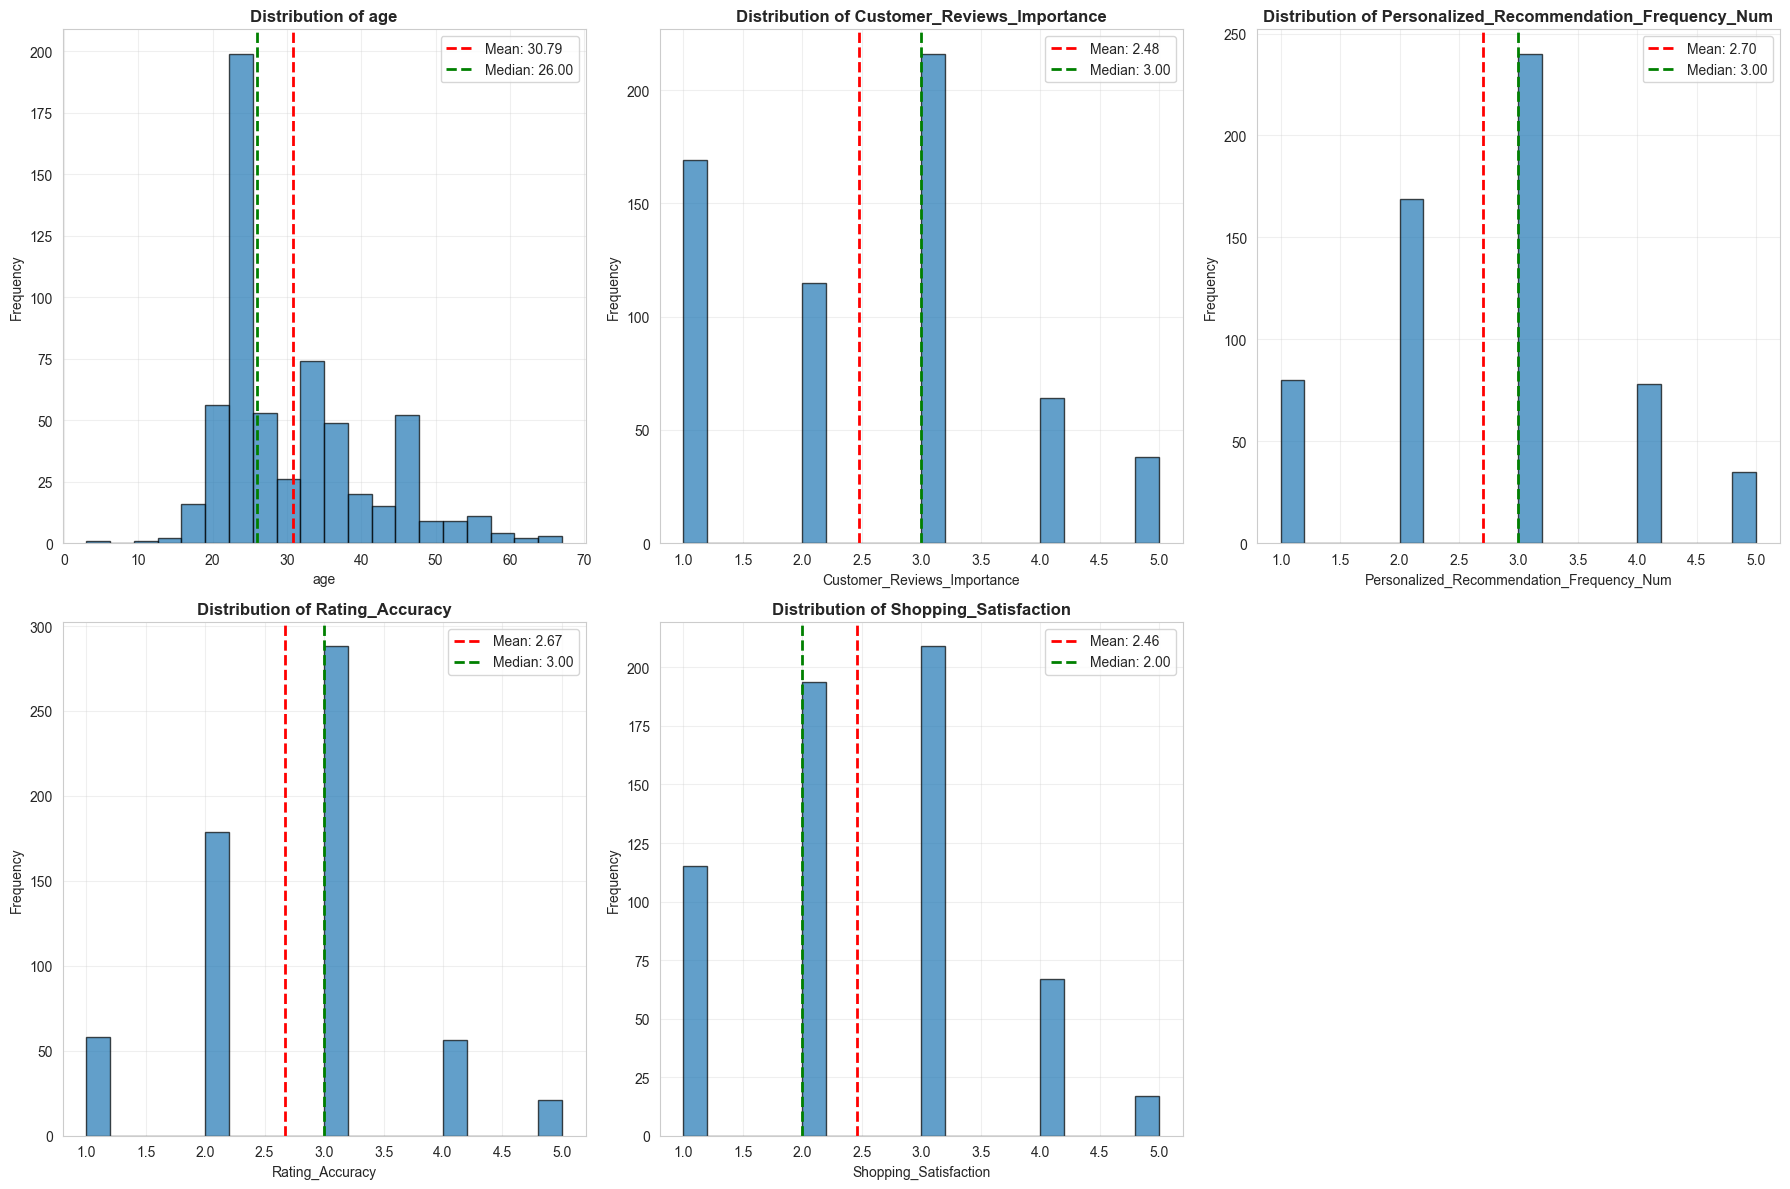


=== STATISTICAL SUMMARY OF NUMERICAL VARIABLES ===
              age  Customer_Reviews_Importance  \
count  602.000000                   602.000000   
mean    30.790698                     2.480066   
std     10.193276                     1.185226   
min      3.000000                     1.000000   
25%     23.000000                     1.000000   
50%     26.000000                     3.000000   
75%     36.000000                     3.000000   
max     67.000000                     5.000000   

       Personalized_Recommendation_Frequency_Num  Rating_Accuracy  \
count                                 602.000000       602.000000   
mean                                    2.699336         2.672757   
std                                     1.042028         0.899744   
min                                     1.000000         1.000000   
25%                                     2.000000         2.000000   
50%                                     3.000000         3.000000   
75%           

In [24]:
# Distribution of numerical variables
numerical_cols = ['age', 'Customer_Reviews_Importance', 'Personalized_Recommendation_Frequency_Num', 
                  'Rating_Accuracy', 'Shopping_Satisfaction']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Histogram with KDE
    df[col].hist(bins=20, ax=ax, alpha=0.7, edgecolor='black')
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Statistical summary
print("\n=== STATISTICAL SUMMARY OF NUMERICAL VARIABLES ===")
print(df[numerical_cols].describe())


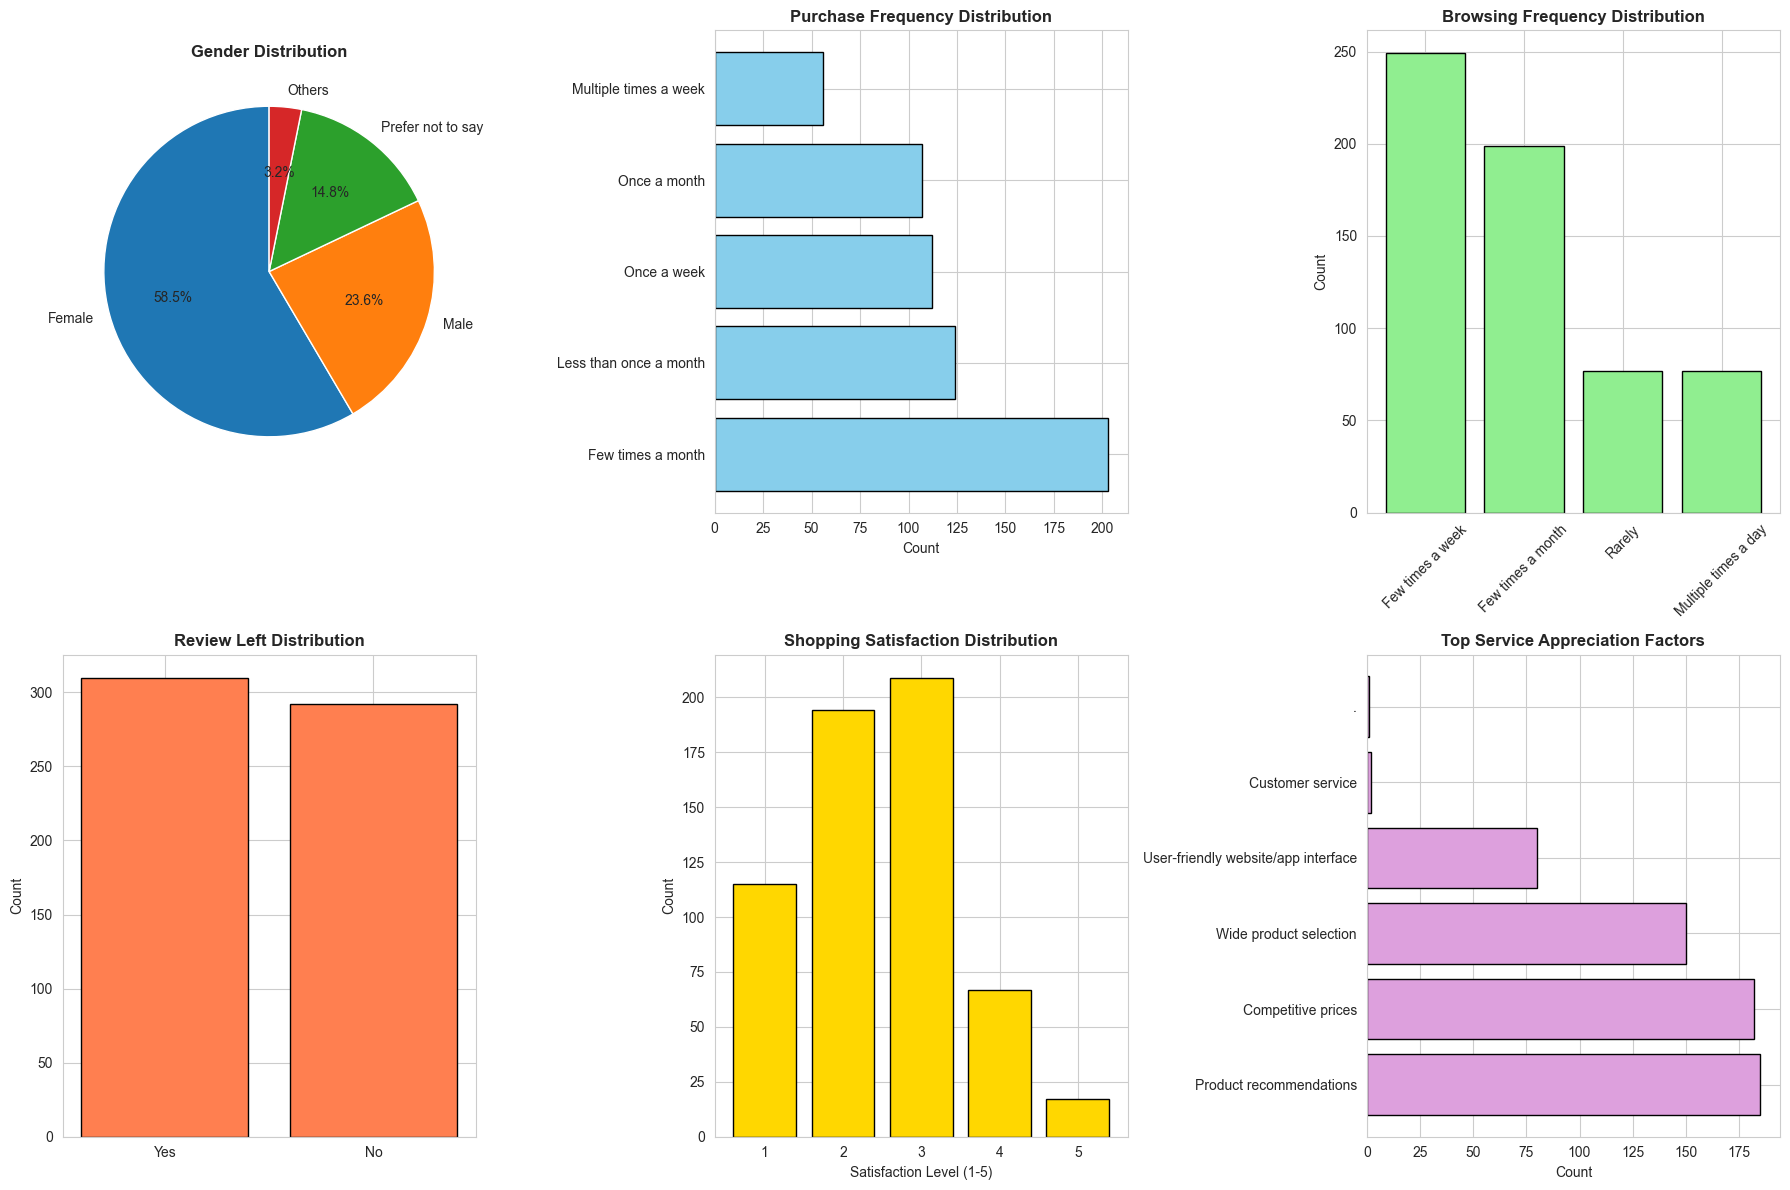

In [25]:
# Distribution of key categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Gender Distribution', fontweight='bold')

# Purchase Frequency
purchase_freq = df['Purchase_Frequency'].value_counts()
axes[0, 1].barh(purchase_freq.index, purchase_freq.values, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Purchase Frequency Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Count')

# Browsing Frequency
browsing_freq = df['Browsing_Frequency'].value_counts()
axes[0, 2].bar(browsing_freq.index, browsing_freq.values, color='lightgreen', edgecolor='black')
axes[0, 2].set_title('Browsing Frequency Distribution', fontweight='bold')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# Review Left
review_left = df['Review_Left'].value_counts()
axes[1, 0].bar(review_left.index, review_left.values, color='coral', edgecolor='black')
axes[1, 0].set_title('Review Left Distribution', fontweight='bold')
axes[1, 0].set_ylabel('Count')

# Shopping Satisfaction (as bar chart for better readability)
satisfaction_counts = df['Shopping_Satisfaction'].value_counts().sort_index()
axes[1, 1].bar(satisfaction_counts.index.astype(str), satisfaction_counts.values, color='gold', edgecolor='black')
axes[1, 1].set_title('Shopping Satisfaction Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Satisfaction Level (1-5)')
axes[1, 1].set_ylabel('Count')

# Service Appreciation (top 6)
service_appr = df['Service_Appreciation'].value_counts().head(6)
axes[1, 2].barh(service_appr.index, service_appr.values, color='plum', edgecolor='black')
axes[1, 2].set_title('Top Service Appreciation Factors', fontweight='bold')
axes[1, 2].set_xlabel('Count')

plt.tight_layout()
plt.show()


### 2. Outlier Detection

We create box plots for all numerical columns to visually identify outliers using the Interquartile Range (IQR) method. Box plots help us see the median, quartiles, and any extreme values that fall outside the normal range. This visualization allows us to assess whether outliers represent valid extreme responses or potential data errors.


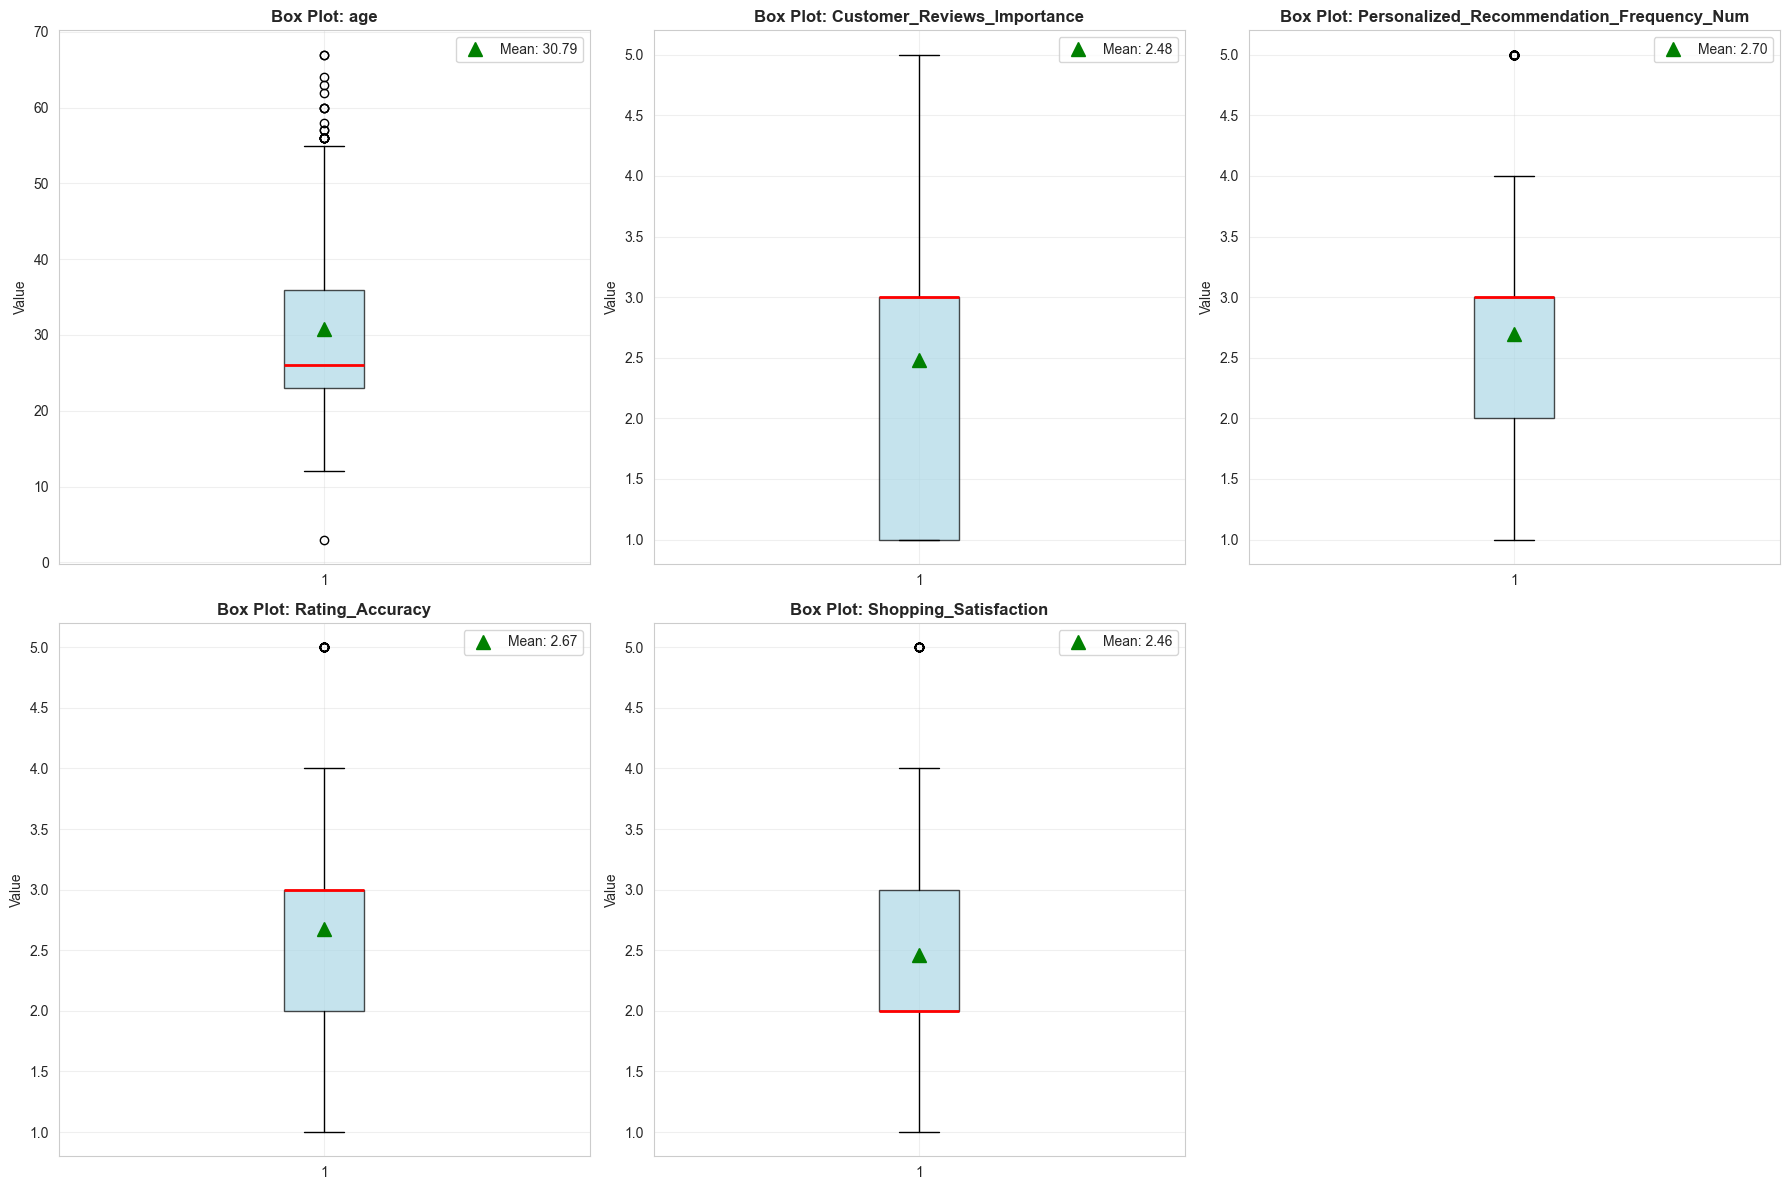


=== OUTLIER SUMMARY ===
age: 20 outliers (3.32%)
Customer_Reviews_Importance: 0 outliers (0.00%)
Personalized_Recommendation_Frequency_Num: 35 outliers (5.81%)
Rating_Accuracy: 21 outliers (3.49%)
Shopping_Satisfaction: 17 outliers (2.82%)


In [26]:
# Box plots for outlier detection in numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Create box plot
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'))
    
    ax.set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Value')
    ax.grid(True, alpha=0.3)
    
    # Add mean marker
    mean_val = df[col].mean()
    ax.plot(1, mean_val, 'g^', markersize=10, label=f'Mean: {mean_val:.2f}')
    ax.legend()

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Summary statistics for outliers
print("\n=== OUTLIER SUMMARY ===")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


### 3. Feature Relationships

This section explores relationships between variables by computing and visualizing correlation matrices for numerical variables, creating scatter plots to examine relationships between key features (such as age vs. satisfaction metrics), and using crosstabulations to analyze relationships between categorical variables. Understanding these relationships helps identify important predictors for future modeling.


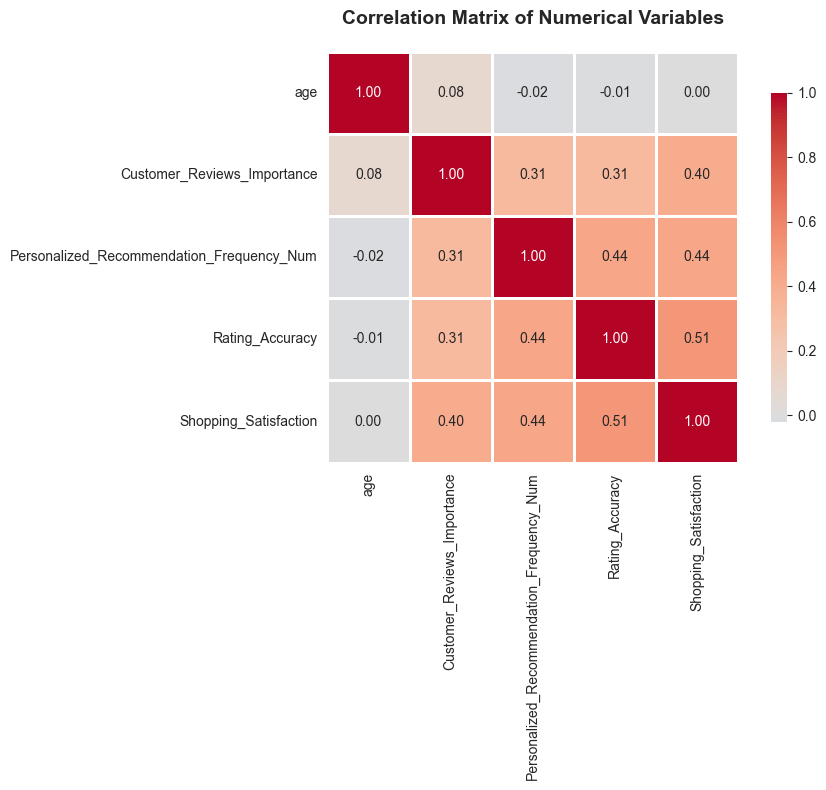


=== KEY CORRELATIONS ===
Customer_Reviews_Importance <-> Personalized_Recommendation_Frequency_Num: 0.314
Customer_Reviews_Importance <-> Rating_Accuracy: 0.315
Customer_Reviews_Importance <-> Shopping_Satisfaction: 0.402
Personalized_Recommendation_Frequency_Num <-> Rating_Accuracy: 0.438
Personalized_Recommendation_Frequency_Num <-> Shopping_Satisfaction: 0.438
Rating_Accuracy <-> Shopping_Satisfaction: 0.514


In [27]:
# Correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n=== KEY CORRELATIONS ===")
# Find strong correlations (above 0.3 or below -0.3)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.3f}")


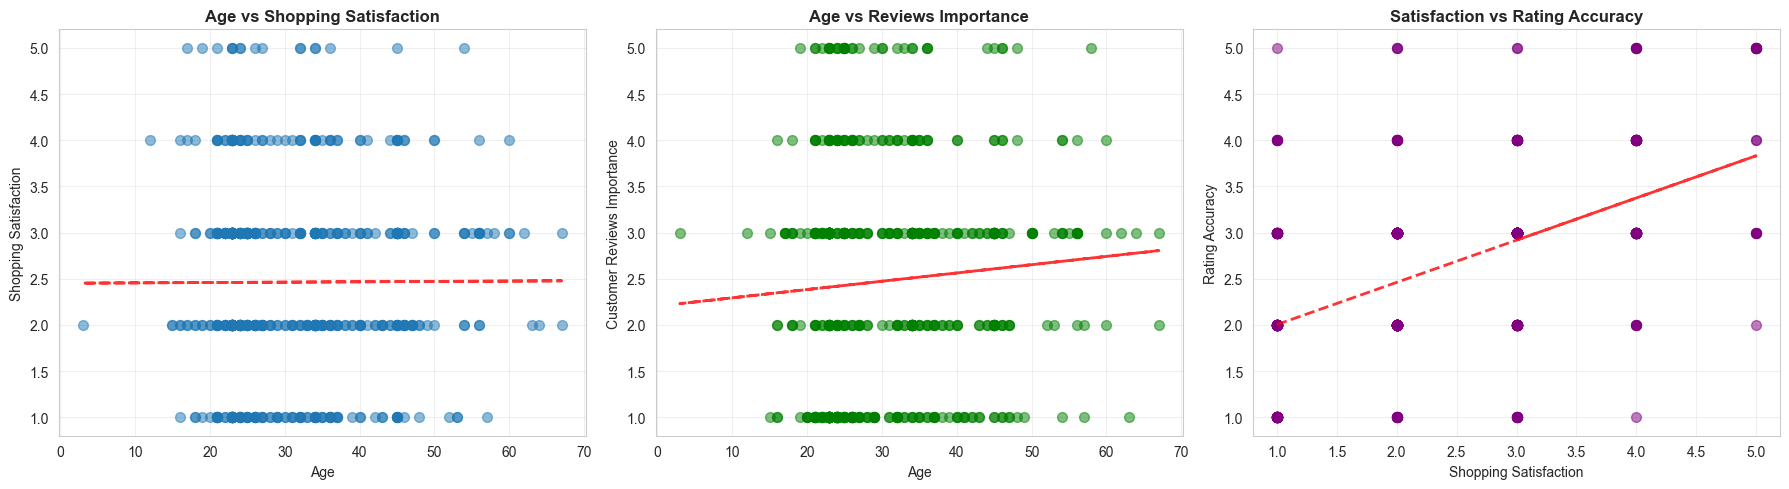

In [28]:
# Relationship between age and satisfaction metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age vs Shopping Satisfaction
axes[0].scatter(df['age'], df['Shopping_Satisfaction'], alpha=0.5, s=50)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Shopping Satisfaction')
axes[0].set_title('Age vs Shopping Satisfaction', fontweight='bold')
axes[0].grid(True, alpha=0.3)
# Add trend line
z = np.polyfit(df['age'], df['Shopping_Satisfaction'], 1)
p = np.poly1d(z)
axes[0].plot(df['age'], p(df['age']), "r--", alpha=0.8, linewidth=2)

# Age vs Customer Reviews Importance
axes[1].scatter(df['age'], df['Customer_Reviews_Importance'], alpha=0.5, s=50, color='green')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Customer Reviews Importance')
axes[1].set_title('Age vs Reviews Importance', fontweight='bold')
axes[1].grid(True, alpha=0.3)
z = np.polyfit(df['age'], df['Customer_Reviews_Importance'], 1)
p = np.poly1d(z)
axes[1].plot(df['age'], p(df['age']), "r--", alpha=0.8, linewidth=2)

# Shopping Satisfaction vs Rating Accuracy
axes[2].scatter(df['Shopping_Satisfaction'], df['Rating_Accuracy'], alpha=0.5, s=50, color='purple')
axes[2].set_xlabel('Shopping Satisfaction')
axes[2].set_ylabel('Rating Accuracy')
axes[2].set_title('Satisfaction vs Rating Accuracy', fontweight='bold')
axes[2].grid(True, alpha=0.3)
z = np.polyfit(df['Shopping_Satisfaction'], df['Rating_Accuracy'], 1)
p = np.poly1d(z)
axes[2].plot(df['Shopping_Satisfaction'], p(df['Shopping_Satisfaction']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

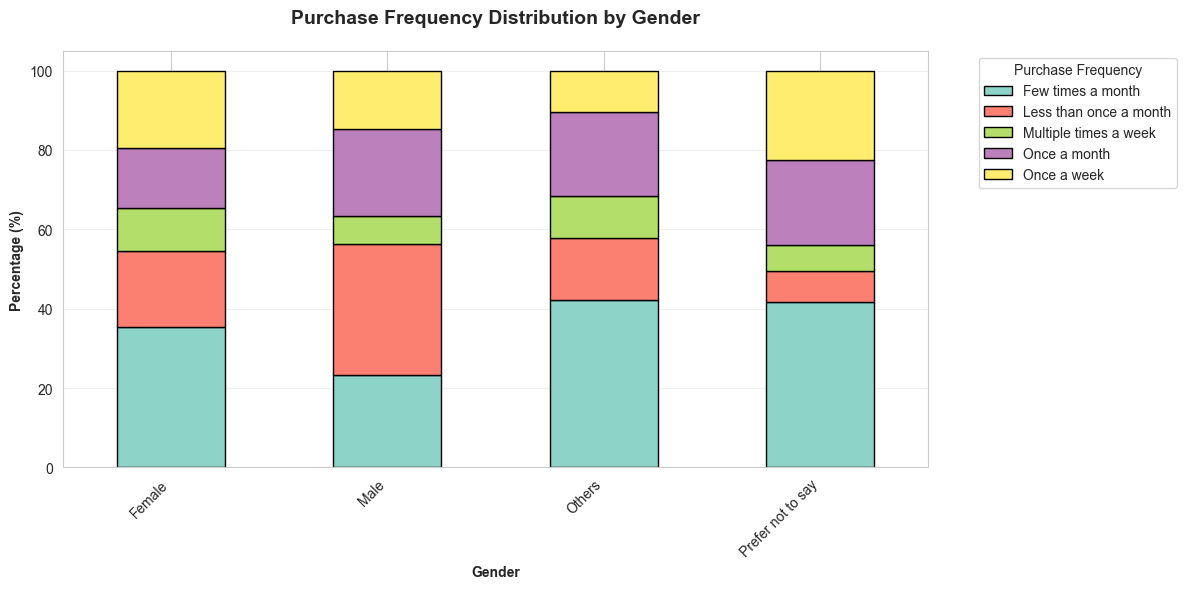

In [29]:
# Analyze relationships between categorical variables
# Purchase Frequency by Gender
purchase_gender = pd.crosstab(df['Gender'], df['Purchase_Frequency'], normalize='index') * 100

plt.figure(figsize=(12, 6))
purchase_gender.plot(kind='bar', stacked=True, colormap='Set3', edgecolor='black')
plt.title('Purchase Frequency Distribution by Gender', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


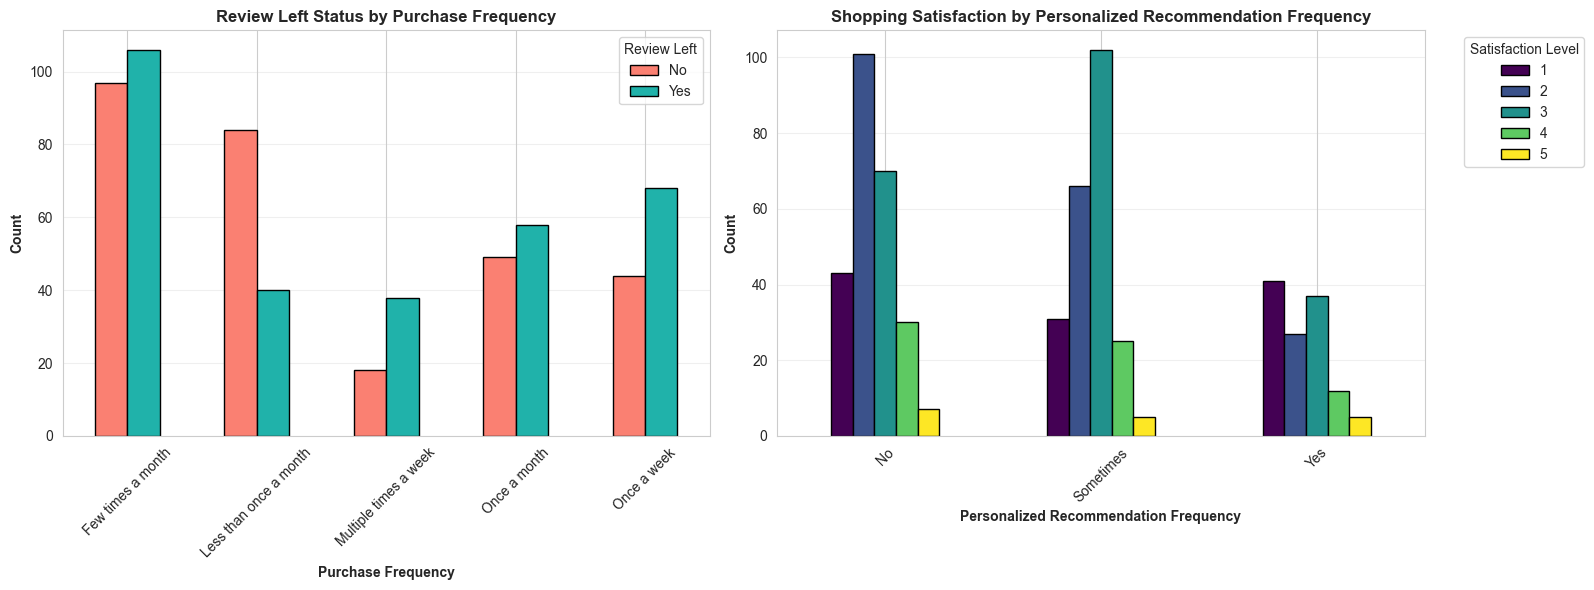

In [30]:
# Review behavior analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Review Left by Purchase Frequency
review_purchase = pd.crosstab(df['Purchase_Frequency'], df['Review_Left'])
review_purchase.plot(kind='bar', ax=axes[0], color=['salmon', 'lightseagreen'], edgecolor='black')
axes[0].set_title('Review Left Status by Purchase Frequency', fontweight='bold')
axes[0].set_xlabel('Purchase Frequency', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].legend(title='Review Left')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Shopping Satisfaction by Personalized Recommendations
satisfaction_rec = pd.crosstab(df['Personalized_Recommendation_Frequency'], df['Shopping_Satisfaction'])
satisfaction_rec.plot(kind='bar', ax=axes[1], colormap='viridis', edgecolor='black')
axes[1].set_title('Shopping Satisfaction by Personalized Recommendation Frequency', fontweight='bold')
axes[1].set_xlabel('Personalized Recommendation Frequency', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


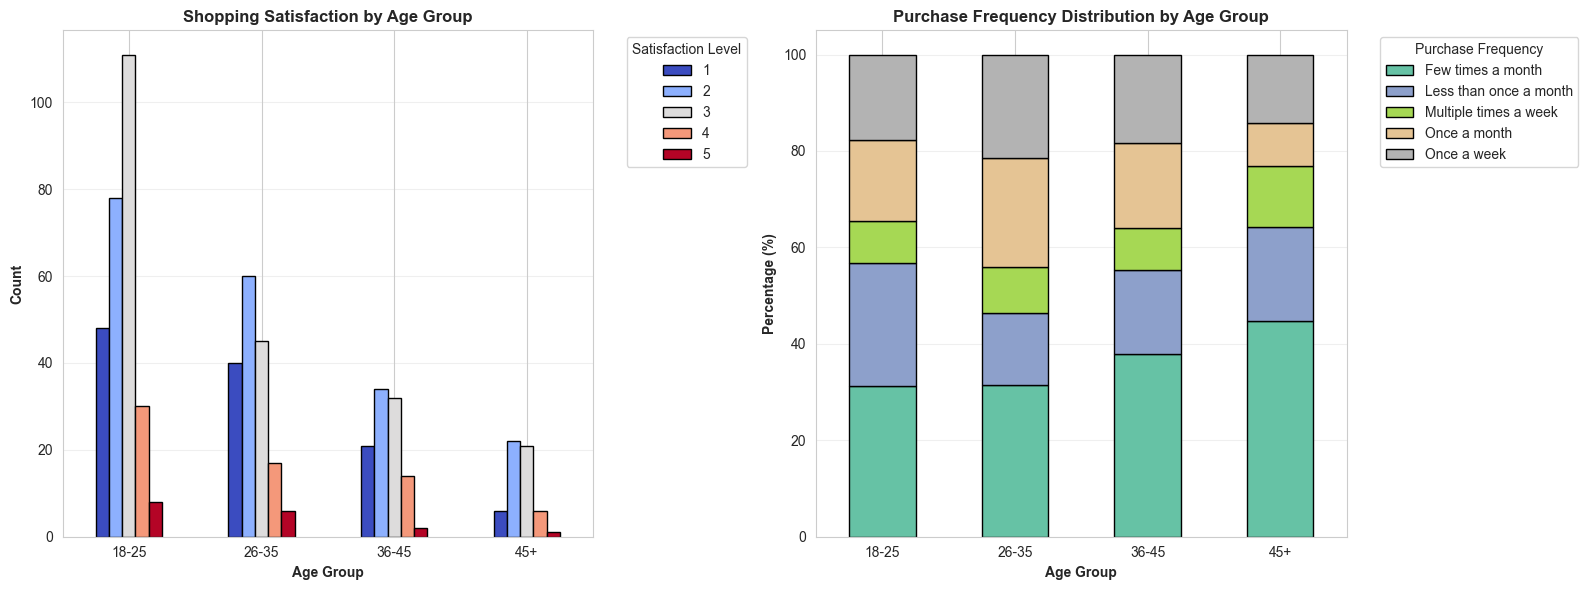

In [31]:
# Analyze age groups and their behavior
df['Age_Group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 100], labels=['18-25', '26-35', '36-45', '45+'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Shopping Satisfaction by Age Group
satisfaction_by_age = pd.crosstab(df['Age_Group'], df['Shopping_Satisfaction'])
satisfaction_by_age.plot(kind='bar', ax=axes[0], colormap='coolwarm', edgecolor='black')
axes[0].set_title('Shopping Satisfaction by Age Group', fontweight='bold')
axes[0].set_xlabel('Age Group', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].legend(title='Satisfaction Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Purchase Frequency by Age Group
purchase_by_age = pd.crosstab(df['Age_Group'], df['Purchase_Frequency'], normalize='index') * 100
purchase_by_age.plot(kind='bar', ax=axes[1], stacked=True, colormap='Set2', edgecolor='black')
axes[1].set_title('Purchase Frequency Distribution by Age Group', fontweight='bold')
axes[1].set_xlabel('Age Group', fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontweight='bold')
axes[1].legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## EDA Insights and Future Modeling Guidance

This section synthesizes all findings from the exploratory data analysis, summarizes key insights about consumer behavior patterns, and provides guidance for future modeling work. We document important relationships discovered, behavioral patterns identified, and recommendations for feature engineering, model selection, and validation strategies.

### Key Insights from Exploratory Data Analysis

In [32]:
print("=" * 80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\n1. DATA DISTRIBUTION INSIGHTS:")
print("   • Age Distribution: Most consumers are between 23-36 years old (median: 26)")
print("   • Gender: Female consumers dominate the dataset (~58.5%)")
print("   • Purchase Frequency: 'Few times a month' is the most common pattern (~34%)")
print("   • Shopping Satisfaction: Tends to cluster around levels 2-3 (moderate satisfaction)")

print("\n2. OUTLIER FINDINGS:")
print("   • Age: Some outliers present (age 3, age 67) but may represent valid responses")
print("   • Satisfaction metrics: Generally well-distributed with some extreme values")
print("   • Recommendation: Consider capping extreme ages if modeling requires, but preserve for now")

print("\n3. FEATURE RELATIONSHIPS:")
corr_satisfaction_accuracy = df['Shopping_Satisfaction'].corr(df['Rating_Accuracy'])
corr_satisfaction_recommend = df['Shopping_Satisfaction'].corr(df['Personalized_Recommendation_Frequency_Num'])
corr_reviews_satisfaction = df['Customer_Reviews_Importance'].corr(df['Shopping_Satisfaction'])

print(f"   • Shopping Satisfaction ↔ Rating Accuracy: {corr_satisfaction_accuracy:.3f} correlation")
print(f"   • Shopping Satisfaction ↔ Recommendation Frequency: {corr_satisfaction_recommend:.3f} correlation")
print(f"   • Reviews Importance ↔ Satisfaction: {corr_reviews_satisfaction:.3f} correlation")

print("\n4. BEHAVIORAL PATTERNS:")
print("   • Consumers who purchase more frequently are more likely to leave reviews")
print("   • Personalized recommendations show varying impact on satisfaction across frequency levels")
print("   • Younger consumers (18-25) show different purchase patterns compared to older groups")

print("\n5. CATEGORICAL INSIGHTS:")
print("   • Product Search Method: 'Categories' is most popular (~37%), followed by 'Keyword' (~36%)")
print("   • Most appreciate 'Competitive prices' and 'Product recommendations'")
print("   • Main improvement areas: 'Product quality and accuracy' and 'Customer service responsiveness'")

print("\n" + "=" * 80)
print("GUIDANCE FOR FUTURE MODELING")
print("=" * 80)

print("\n1. TARGET VARIABLE SELECTION:")
print("   • Primary target: 'Shopping_Satisfaction' (ordinal, 1-5 scale)")
print("   • Secondary targets: 'Review_Left', 'Purchase_Frequency'")
print("   • All three are valuable for different prediction objectives")

print("\n2. FEATURE ENGINEERING RECOMMENDATIONS:")
print("   • Create age groups (already demonstrated) for better categorical modeling")
print("   • Extract features from 'Purchase_Categories' (count of categories, presence of specific ones)")
print("   • Combine related features (e.g., review-related metrics into composite score)")
print("   • Consider interaction terms: Age × Gender, Purchase_Frequency × Satisfaction")

print("\n3. MODELING APPROACHES:")
print("   • Classification: For categorical targets (Review_Left, Purchase_Frequency)")
print("   • Regression: For ordinal satisfaction scores (with careful handling of scale)")
print("   • Ensemble methods: Given feature heterogeneity (numerical + categorical)")
print("   • Consider ordinal regression for satisfaction (respects 1-5 ordering)")

print("\n4. PREPROCESSING STEPS NEEDED:")
print("   • Encode categorical variables (one-hot for nominal, ordinal for frequency-based)")
print("   • Scale numerical features if using distance-based algorithms")
print("   • Handle class imbalance if present (check Review_Left distribution)")
print("   • Feature selection: Remove 'Timestamp' or convert to temporal features if relevant")

print("\n5. POTENTIAL CHALLENGES:")
print("   • Mixed data types require careful encoding strategy")
print("   • Some categorical variables have many unique values (e.g., Purchase_Categories)")
print("   • Ordinal nature of satisfaction/rating scales should be preserved")
print("   • Sample size (602 rows) limits complex model complexity")

print("\n6. VALIDATION STRATEGY:")
print("   • Use stratified k-fold cross-validation (especially for categorical targets)")
print("   • Train-test split should maintain distribution of key categorical variables")
print("   • Monitor for overfitting given relatively small dataset")

print("=" * 80)


KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATA DISTRIBUTION INSIGHTS:
   • Age Distribution: Most consumers are between 23-36 years old (median: 26)
   • Gender: Female consumers dominate the dataset (~58.5%)
   • Purchase Frequency: 'Few times a month' is the most common pattern (~34%)
   • Shopping Satisfaction: Tends to cluster around levels 2-3 (moderate satisfaction)

2. OUTLIER FINDINGS:
   • Age: Some outliers present (age 3, age 67) but may represent valid responses
   • Satisfaction metrics: Generally well-distributed with some extreme values
   • Recommendation: Consider capping extreme ages if modeling requires, but preserve for now

3. FEATURE RELATIONSHIPS:
   • Shopping Satisfaction ↔ Rating Accuracy: 0.514 correlation
   • Shopping Satisfaction ↔ Recommendation Frequency: 0.438 correlation
   • Reviews Importance ↔ Satisfaction: 0.402 correlation

4. BEHAVIORAL PATTERNS:
   • Consumers who purchase more frequently are more likely to leave reviews
   • Personalized 